In [ ]:
r"""°°°
# reranking code for the result
## get the probability of RNA(nucleotide, codon) mutation
## formula is aX + bY + cZ

|Probability||||
|---|---|---|---|
A to C	1.1309cZ882976023E-05
A to G	3.79592984444666E-05
A to T	2.17601073885478E-05
C to A	4.82364467163978E-05
C to G	1.43123713007997E-05
C to T	0.000615014695634072
G to A	0.000111490944193118
G to C	7.0550851521742E-05
G to T	0.000311342109361459
T to A	7.57183086181891E-06
T to C	5.12463411619656E-05
T to G	6.88348260165355E-06
	
A to C	0.000480370596901429
A to G	0.00161226521002784
A to T	0.000924228464347168
C to A	0.000214773685034829
C to G	6.37261020475316E-05
C to T	0.00273836448419408
G to A	0.000681726831066903
G to C	0.000431392960074668
G to T	0.00190374448013487
T to A	0.00034768052837326
T to C	0.00235311053529112
T to G	0.000316073207612054
°°°"""
# |%%--%%| <Q1ZxZLnCEM|W0hgKtTx0g>

In [ ]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
"""
for the single mutant sequence X, calculate the mutation prob.
RNA codon
ARNDBCQEZGHILKMFPSTWYV
START, STOP(*)

DNA codon
ARNDBCQEZGHILKMFPSTWYV
START, STOP(*)

ammino acids standard alphabets
ACDEFGHIKLMNOPQRSTVWY
X: any
B: D or N
Z: E or Q
J: I or L
"""

In [ ]:
cov_p_table = {"AA": 1, "AC": 0.000011309882976023, 
               "AG": 0.0000379592984444666, "AT": 0.0000217601073885478,
                "CA": 0.0000482364467163978, "CC": 1, 
                "CG": 0.0000143123713007997, "CT": 0.000615014695634072, 
                "GA": 0.000111490944193118, "GC": 0.000070550851521742, 
                "GG": 1, "GT": 0.000311342109361459,
                "TA": 0.00000757183086181891, "TC": 0.0000512463411619656, 
                "TG": 0.00000688348260165355, "TT": 1}

In [ ]:
h1n1_p_table = {
                "AA": 1, "AC":1.1309882976023E-05,
                "AG":3.79592984444666E-05 , "AT":2.17601073885478E-05,
                "CA":4.82364467163978E-05 , "CC":1,
                "CG":1.43123713007997E-05 , "CT":0.000615014695634072,
                "GA":0.000111490944193118 , "GC":7.0550851521742E-05,
                "GG": 1, "GT":0.000311342109361459,
                "TA":7.57183086181891E-06 , "TC":5.12463411619656E-05,
                "TG":6.88348260165355E-06 , "TT":1
                }
def to_codons(ammino_acid):
    std_codon_table = CodonTable.unambiguous_dna_by_id[1]
    codons = [codon for codon, aa in std_codon_table.forward_table.items() \
        if aa == ammino_acid]
    assert len(codons) > 0, f'ammino_acid = {ammino_acid}'
    # print(f'{ammino_acid} is mapped to {codons}')
    return codons

In [ ]:
# 3 char for each codon
def get_codon_probability(wt_codon, mut_codon, p_table):
    p = 1
    for ch1, ch2 in zip(wt_codon, mut_codon):
        # print(f"prob {ch1} to {ch2}")
        p *= p_table[ch1 + ch2]
    # print(f'p = {p}')
    return p

In [ ]:
def get_codon_aa_probability(wt_codon, mut_aa, p_table):
    mut_codons = to_codons(mut_aa)
    prob_list = [get_codon_probability(wt_codon, mut_codon, p_table) for mut_codon in mut_codons]
    # print(prob_list)
    # print(type(prob_list))
    assert len(prob_list) > 0, f"changed from {wt_codon}, \
        to {mut_codons}, mut aa is {mut_aa}"
    return sum(prob_list)

In [ ]:
triple_prob_df = pd.read_excel("12276_2021_658_MOESM2_ESM.xlsx", sheet_name=3)
def get_triple_prob(begin, origin, change, end):
    key = begin + origin + '>' + change + end
    row = triple_prob_df[dual_prob_df['Substition type'] == key].index.values[0]
    # row = get_row_index(dual_prob_df, key)
    sum = triple_prob_df['SARS-CoV-2'].sum()
    prob = triple_prob_df['SARS-CoV-2'].iloc[row] / sum
    return prob
    #for wt_codon in wt_codons:
    #    for mut_codon in mut_codons:
    #        print(f'{wt_codon} -> {mut_codon}')
    #        print(f'prob = {get_codon_probability(wt_codon, mut_codon)}')

In [3]:
# df = pd.read_csv("wt_codon.csv")
get_codon_aa_probability("GAC", "L", h1n1_p_table)

1.5366580550713715e-09

|%%--%%| <W0hgKtTx0g|1ce9VrFpWP>

In [ ]:
"""
rerank code
input file: prob table already built
file format: tab based csv like
"""
from enum import Enum
class Virus(Enum):
    COV = 1
    FLU = 2
from enum import Enum
class Virus(Enum):
    COV = 1
    FLU = 2
h1n1_df = pd.read_csv("results/flu/semantics/analyze_semantics_flu_h1_bilstm_512.txt", delimiter='\t')
cov_df = pd.read_csv("results/cov/semantics/analyze_semantics_cov_bilstm_512.txt", delimiter='\t')

In [ ]:
cov_wt_codon_df = pd.read_csv("wt_codon.csv")
h1n1_wt_codon_df = pd.read_csv("h1n1_wt_codon.csv")
# fis pos = pFLUos - 1 (make it start from 0, not 1)
h1n1_wt_codon_df['pos'] -= 1

In [ ]:
def wt_codon(position, wt_codon_df):
    try:
        codon = wt_codon_df[wt_codon_df['pos'] == position]['Codon'].values[0]
    except IndexError:
        print(f"Error position is {position}")
    return codon

In [ ]:
def virus_table(virus_type:Virus):
    return (cov_df, cov_p_table, cov_wt_codon_df) if virus_type == Virus.COV \
        else (h1n1_df, h1n1_p_table, h1n1_wt_codon_df)

In [ ]:
def process_viral_result_table(virus_type: Virus):
    rank_df, p_table, wt_codon_df = virus_table(virus_type)

    # get rid of junklike alphabet
    rank_df = rank_df[~rank_df['wt'].str.contains('X|B|Z|J|U', case=False, na=False)]
    rank_df = rank_df[~rank_df['mut'].str.contains('X|B|Z|J|U', case=False, na=False)]
    

    # translate aa to codon
    rank_df['codon'] = rank_df.apply(lambda row: wt_codon(row['pos'], wt_codon_df), axis=1)

    # get wild type codon to mutation probability
    rank_df['codon_prob'] = rank_df.apply(
        lambda row: get_codon_aa_probability(wt_codon(row['pos'], wt_codon_df), 
                                        row['mut'], p_table), axis=1)

    # make rank columns
    rank_df['grammar_rank'] = rank_df['prob'].rank(method='min', ascending=False)
    rank_df['semantic_rank'] = rank_df['change'].rank(method='min', ascending=False)
    rank_df['codon_mut_rank'] = rank_df['codon_prob'].rank(method='min', ascending=False)
    rank_df['rank_sum'] = rank_df['grammar_rank'] + rank_df['semantic_rank'] # + rank_df['codon_mut_rank']
    rank_df['total_rank'] = rank_df['rank_sum'].rank(method='min', ascending=True)
    return rank_df

In [101]:
# wt_codon(0, h1n1_wt_codon_df)
df = process_viral_result_table(Virus.COV)
df

,pos,wt,mut,prob,change,is_viable,is_escape,codon,codon_prob,grammar_rank,semantic_rank,codon_mut_rank,rank_sum,total_rank
0,0,M,A,2.190679e-06,1389.0,False,False,ATG,1.946235e-09,9919.0,23447.0,12638.0,33366.0,20309.0
2,0,M,C,1.529340e-06,3214.0,False,False,ATG,5.720196e-14,10773.0,12545.0,21897.0,23318.0,11189.0
3,0,M,D,6.757930e-09,1710.0,False,False,ATG,1.097642e-13,20644.0,22586.0,21464.0,43230.0,23874.0
4,0,M,E,1.990447e-07,1568.0,False,False,ATG,2.874534e-10,15302.0,23025.0,17568.0,38327.0,22694.0
5,0,M,F,1.245590e-07,1209.0,False,False,ATG,8.310032e-09,16250.0,23779.0,9655.0,40029.0,23213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30544,0,M,S,8.232845e-08,769.5,False,False,ATG,3.744430e-09,17084.0,24137.0,11055.0,41221.0,23497.0
30545,0,M,T,2.829840e-05,701.5,False,False,ATG,5.127163e-05,4215.0,24155.0,2403.0,28370.0,16653.0
30547,0,M,V,8.076018e-06,765.0,False,False,ATG,3.797803e-05,6856.0,24138.0,3463.0,30994.0,18721.0
30548,0,M,W,1.012355e-09,1172.0,False,False,ATG,1.497853e-10,22265.0,23830.0,18554.0,46095.0,24141.0


|%%--%%| <1ce9VrFpWP|FIqnmBhr0F>

In [102]:
df2 = df[df['is_escape'] == True]
mean = df2['total_rank'].mean()
df2
mean

3757.157894736842

|%%--%%| <FIqnmBhr0F|0W6oYAWuRU>

In [163]:
df3 = df[df['pos'] == 416]
df3

,pos,wt,mut,prob,change,is_viable,is_escape,grammar_rank,semantic_rank,codon,codon_prob,codon_mut_rank,rank_sum,total_rank
4929,416,K,A,1.492227e-05,2024.0,False,False,5495.0,21332.0,AAG,4.293152e-10,15961.0,42788.0,16801.0
4931,416,K,C,5.873601e-11,6548.0,False,False,23465.0,1841.0,AAG,2.571681e-13,20837.0,46143.0,18821.0
4932,416,K,D,2.831750e-05,2118.0,False,False,4213.0,20622.0,AAG,1.181833e-08,9158.0,33993.0,10744.0
4933,416,K,E,3.900901e-05,2840.0,True,True,3648.0,15610.0,AAG,3.795930e-05,3313.0,22571.0,3411.0
4934,416,K,F,2.026809e-08,2874.0,False,False,19310.0,15345.0,AAG,1.474212e-13,21114.0,55769.0,22709.0
4935,416,K,G,3.208793e-05,2814.0,False,False,3980.0,15828.0,AAG,1.440908e-09,12941.0,32749.0,9859.0
4936,416,K,H,5.924973e-05,803.0,False,False,2951.0,24123.0,AAG,3.521243e-09,11162.0,38236.0,13681.0
4937,416,K,I,5.971444e-05,2198.0,False,False,2938.0,20154.0,AAG,6.774838e-09,9768.0,32860.0,9929.0
25483,416,K,L,3.474759e-08,1971.0,False,False,18512.0,21581.0,AAG,4.735023e-10,15736.0,55829.0,22725.0
25484,416,K,M,6.856607e-08,1856.0,False,False,17410.0,22046.0,AAG,2.176011e-05,4111.0,43567.0,17279.0


|%%--%%| <0W6oYAWuRU|Dm0woARBtw>

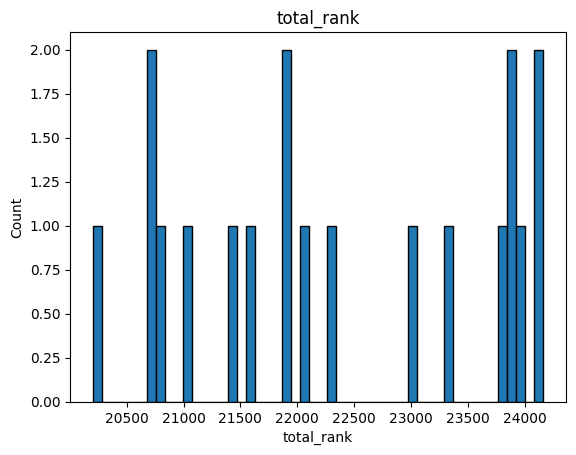

In [152]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots()

In [ ]:
fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

In [ ]:
ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

In [ ]:
ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

In [ ]:
plt.show()
# |%%--%%| <Dm0woARBtw|SW93MwzGS7>

In [179]:
val = [1,2,3,4]
def change_list(l):
    l.append(1)
    return
change_list(val)
val

[1, 2, 3, 4, 1]

|%%--%%| <SW93MwzGS7|ad8ozjoZIg>

In [ ]:
from enum import Enum

In [ ]:
class Color(Enum):
    RED = 1
    GREEN = 2
    BLUE = 3

In [185]:
test = Color.BLUE
if test == Color.BLUE:
    print("BLUE")
else: print("Not BLUE")

BLUE


|%%--%%| <ad8ozjoZIg|IQ7MDFOD0I>

In [64]:
cov_wt_codon_df = pd.read_csv("wt_codon.csv")
cov_wt_codon_df.iloc[0]

pos        0
Codon    ATG
1AA        M
Name: 0, dtype: object

|%%--%%| <IQ7MDFOD0I|EOSrc0foCo>

In [2]:
import pandas as pd
from Bio.Data import CodonTable
cov_wt_codon_df = pd.read_csv('wt_codon.csv')
flu_wt_codon_df = pd.read_csv('h1n1_wt_codon.csv')
mut_prob_table = pd.read_excel('12276_2021_658_MOESM2_ESM.xlsx', sheet_name=3)
flu_wt_codon_df[flu_wt_codon_df['pos'] == 111]

,pos,Codon,1AA
111,111,CTC,L


|%%--%%| <EOSrc0foCo|rzBG3vd1kD>

In [ ]:
def to_codons(ammino_acid):
    std_codon_table = CodonTable.unambiguous_dna_by_id[1]
    codons = [codon for codon, aa in std_codon_table.forward_table.items() \
        if aa == ammino_acid]
    assert len(codons) > 0, f'ammino_acid = {ammino_acid}'
    # print(f'{ammino_acid} is mapped to {codons}')
    return codons

In [ ]:
# target_str format: "XX>XX"
def get_mutation_probability(target_str):
    if target_str[1] == target_str[3]:
        return 1
    # sum = mut_prob_table['SARS-CoV-2'].sum()
    sum = mut_prob_table['Influenza A'].sum()
    # val = mut_prob_table[mut_prob_table['Substition type'] == target_str]\
    #     ['SARS-CoV-2'].values[0]
    val = mut_prob_table[mut_prob_table['Substition type'] == target_str]\
        ['Influenza A'].values[0]
    # print(f'mutation_probability = {val / sum}')
    return val / sum

In [ ]:
def make_string(a, b, c, d):
    return a + b + '>' + c + d

In [ ]:
def codon_mutation_probability(prefix, wt_codon, mut_codon, postfix) -> list:
    # alias
    ms = make_string
    prob_sum = []
    # 0 1 2 
    str1 = ms(prefix, wt_codon[0], mut_codon[0], wt_codon[1])
    str2 = ms(mut_codon[0], wt_codon[1], mut_codon[1], wt_codon[2])
    str3 = ms(mut_codon[1], wt_codon[2], mut_codon[2], postfix)
    prob = 1
    for str in [str1, str2, str3]:
        prob *= get_mutation_probability(str)
    # print(f'for {str1}, {str2}, {str3}, prob = {prob}')
    if prob != 1:
        prob_sum.append(prob)

    # 0 2 1 
    str1 = ms(prefix, wt_codon[0], mut_codon[0], wt_codon[1])
    str2 = ms(wt_codon[1], wt_codon[2], mut_codon[2], postfix)
    str3 = ms(mut_codon[0], wt_codon[1], mut_codon[1], mut_codon[2])
    prob = 1
    for str in [str1, str2, str3]:
        prob *= get_mutation_probability(str)
    # print(f'for {str1}, {str2}, {str3}, prob = {prob}')
    if prob != 1:
        prob_sum.append(prob)


    # 1 0 2
    str1 = ms(wt_codon[0], wt_codon[1], mut_codon[1], wt_codon[2])
    str2 = ms(prefix, wt_codon[0], mut_codon[0], mut_codon[1])
    str3 = ms(mut_codon[1], wt_codon[2], mut_codon[2], postfix)
    prob = 1
    for str in [str1, str2, str3]:
        prob *= get_mutation_probability(str)
    # print(f'for {str1}, {str2}, {str3}, prob = {prob}')
    if prob != 1:
        prob_sum.append(prob)

    # 1 2 0
    str1 = ms(wt_codon[0], wt_codon[1], mut_codon[1], wt_codon[2])
    str2 = ms(mut_codon[1], wt_codon[2], mut_codon[2], postfix)
    str3 = ms(prefix, wt_codon[0], mut_codon[0], mut_codon[1])
    prob = 1
    for str in [str1, str2, str3]:
        prob *= get_mutation_probability(str)
    # print(f'for {str1}, {str2}, {str3}, prob = {prob}')
    if prob != 1:
        prob_sum.append(prob)
    
    # 2 0 1 
    str1 = ms(wt_codon[1], wt_codon[2], mut_codon[2], postfix)
    str2 = ms(prefix, wt_codon[0], mut_codon[0], wt_codon[1])
    str3 = ms(mut_codon[0], wt_codon[1], mut_codon[1], mut_codon[2])
    prob = 1
    for str in [str1, str2, str3]:
        prob *= get_mutation_probability(str)
    # print(f'for {str1}, {str2}, {str3}, prob = {prob}')
    if prob != 1:
        prob_sum.append(prob)

    # 2 1 0
    str1 = ms(wt_codon[1], wt_codon[2], mut_codon[2], postfix)
    str3 = ms(wt_codon[0], wt_codon[1], mut_codon[1], mut_codon[2])
    str3 = ms(prefix, wt_codon[0], mut_codon[0], mut_codon[1])
    prob = 1
    for str in [str1, str2, str3]:
        prob *= get_mutation_probability(str)
    # print(f'for {str1}, {str2}, {str3}, prob = {prob}')
    if prob != 1:
        prob_sum.append(prob)

    # print(f'prob_sum = {prob_sum}')
    return max(prob_sum)

In [ ]:
# boundary exception warning
def aa_mutation_probability(codon_df, starting_position, mut_aa):
    assert get_aa_from_position(codon_df, starting_position) != mut_aa,\
        f'starting position = {starting_position}, mut_aa = {mut_aa}'
    mut_codons = to_codons(mut_aa)

    pre = starting_position - 1
    post = starting_position + 1
    prefix = get_codon_from_position(codon_df, pre)[2]
    postfix = get_codon_from_position(codon_df, post)[0]
    wt_codon = get_codon_from_position(codon_df, starting_position)
    # print(prefix, wt_codon, mut_codons, postfix)
    
    probs = [codon_mutation_probability(prefix, wt_codon, mut_codon, postfix) for mut_codon in mut_codons]
    # print(probs)
    return sum(probs)

In [ ]:
def get_aa_from_position(codon_df, position):
    return codon_df.iloc[position]['1AA']

In [ ]:
def get_codon_from_position(codon_df, position):
    return codon_df.iloc[position]['Codon']

result = aa_probability(cov_wt_c['codon']odon_df, 20, 'K')
cov_wt_codon_df.iloc[40]['Codon'][0]
aa_probability(cov_wt_codon_df, 20, 'T')
test = get_mutation_probability('GA>TA')

In [2]:
# val = mut_prob_table[mut_prob_table['Substition type'] == 'GA>TA']
# val = get_mutation_probability('GA>TA')
val = aa_mutation_probability(flu_wt_codon_df, 10, 'L')
val

NameError: name 'flu_wt_codon_df' is not defined

|%%--%%| <rzBG3vd1kD|qr9u0edldf>

In [ ]:
def wt_codon(position, wt_codon_df):
    try:
        codon = wt_codon_df[wt_codon_df['pos'] == position]['Codon'].values[0]
    except IndexError:
        print(f"Error position is {position}")
    return codon

In [ ]:
# cov_df = pd.read_csv("results/cov/semantics/analyze_semantics_cov_bilstm_512.txt", delimiter='\t')
flu_df = pd.read_csv("results/flu/semantics/analyze_semantics_flu_h1_bilstm_512.txt", delimiter='\t')
rank_df = flu_df
# get rid of start and last position
max_pos = rank_df['pos'].max()
rank_df = rank_df[(rank_df['pos'] != 0) & (rank_df['pos'] != max_pos)]

In [ ]:
# get rid of junklike alphabet
rank_df = rank_df[~rank_df['wt'].str.contains('X|B|Z|J|U', case=False, na=False)]
rank_df = rank_df[~rank_df['mut'].str.contains('X|B|Z|J|U', case=False, na=False)]

In [14]:
# translate aa to codon
rank_df['codon'] = rank_df.apply(lambda row: wt_codon(row['pos'], flu_wt_codon_df), axis=1)
# get wild type codon to mutation probability
rank_df['codon_prob'] = rank_df.apply(
    lambda row: aa_mutation_probability(flu_wt_codon_df, row['pos'], row['mut']), axis=1)
rank_df

,pos,wt,mut,prob,change,is_viable,is_escape,codon,codon_prob
12,1,K,A,1.354414e-04,395.0,True,False,AAG,7.109542e-05
14,1,K,C,2.539524e-06,962.0,True,False,AAG,4.458999e-08
15,1,K,D,2.041175e-04,660.5,True,False,AAG,2.266179e-05
16,1,K,E,1.063409e-02,447.2,True,False,AAG,9.315022e-03
17,1,K,F,1.755907e-05,673.5,True,False,AAG,2.528029e-08
...,...,...,...,...,...,...,...,...,...
13540,1,K,S,1.811645e-05,576.5,True,False,AAG,2.500679e-03
13541,1,K,T,1.330616e-05,502.8,True,False,AAG,1.961809e-02
13543,1,K,V,5.635023e-05,680.5,True,False,AAG,3.115799e-05
13544,1,K,W,8.003005e-10,896.5,True,False,AAG,1.049413e-05


|%%--%%| <qr9u0edldf|kRzGntSq0H>

In [17]:
# make rank columns
rank_df['grammar_rank'] = rank_df['prob'].rank(method='min', ascending=False)
rank_df['semantic_rank'] = rank_df['change'].rank(method='min', ascending=False)
rank_df['codon_mut_rank'] = rank_df['codon_prob'].rank(method='min', ascending=False)
rank_df['rank_sum'] = rank_df['grammar_rank'] + rank_df['codon_mut_rank'] + rank_df['semantic_rank'] 
# rank_df['rank_sum'] = rank_df['codon_mut_rank']
rank_df['total_rank'] = rank_df['rank_sum'].rank(method='min', ascending=True)
rank_df
#

,pos,wt,mut,prob,change,is_viable,is_escape,codon,codon_prob,grammar_rank,semantic_rank,codon_mut_rank,rank_sum,total_rank
12,1,K,A,1.354414e-04,395.0,True,False,AAG,7.109542e-05,2077.0,10671.0,5546.0,18294.0,6947.0
14,1,K,C,2.539524e-06,962.0,True,False,AAG,4.458999e-08,5705.0,10072.0,10225.0,26002.0,10282.0
15,1,K,D,2.041175e-04,660.5,True,False,AAG,2.266179e-05,1788.0,10507.0,6883.0,19178.0,7520.0
16,1,K,E,1.063409e-02,447.2,True,False,AAG,9.315022e-03,308.0,10644.0,2016.0,12968.0,3267.0
17,1,K,F,1.755907e-05,673.5,True,False,AAG,2.528029e-08,3776.0,10496.0,10413.0,24685.0,9970.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13540,1,K,S,1.811645e-05,576.5,True,False,AAG,2.500679e-03,3747.0,10572.0,3308.0,17627.0,6499.0
13541,1,K,T,1.330616e-05,502.8,True,False,AAG,1.961809e-02,4028.0,10615.0,644.0,15287.0,4870.0
13543,1,K,V,5.635023e-05,680.5,True,False,AAG,3.115799e-05,2756.0,10490.0,6587.0,19833.0,7898.0
13544,1,K,W,8.003005e-10,896.5,True,False,AAG,1.049413e-05,10361.0,10223.0,7601.0,28185.0,10606.0


|%%--%%| <kRzGntSq0H|8kwNSmwdI0>

# wt_codon(0, h1n1_wt_codon_df)
df = process_viral_result_table(Virus.COV)

In [18]:
df2 = rank_df[rank_df['is_escape'] == True]
mean = df2['total_rank'].mean()
mean

2811.7